## Project 2 - Reddit Dataset


### Data Preparation

- Pre-processing steps which include loading the data and working with the features

Importing the python libraries, reading the reddit dataset, data exploration and selection of the data and labels

1. Numpy: It will provide the support for efficient numerical computation.
2. Pandas: It is convenient library that supports dataframes. Working with pandas will bring ease in many crucial data operations.
3. Matplotlib: It provides a MATLAB-like plotting framework.
4. Seaborn: It is a visualization library based on matplotlib which provides a high-level interface for drawing attractive statistical graphics.
5. Sklearn: It is python library for data mining, data analysis and machine learning.

In [1]:
import sys
import csv
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Data Extraction Process

Since the downloaded JSON file (.zst) is too big that is why we extracted certain data from each JSON file and then concat it. Which we did by the folllowing steps:

1. First we need to decompress the each JSON file as follow : zstd -d <filename>
    
2. Then with python scripts : file_extraction.py : we read the JSON file and then save it to CSV file.

In below there are the list of CSV files.

In [3]:
%ls *.zip

 Volume in drive C is OS
 Volume Serial Number is D02B-1246

 Directory of C:\Users\somak\Desktop\Python-Reddit-Data-Prediction-Machine-Learning

2020-04-15  10:26 PM        16,236,545 RS_2019_01_02_03_04.zip
2020-04-15  10:33 PM         8,358,687 RS_2019_05_06.zip
2020-04-15  10:33 PM         8,303,239 RS_2019_07_08.zip
               3 File(s)     32,898,471 bytes
               0 Dir(s)  98,810,384,384 bytes free


In [4]:
for filename in os.listdir():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename,"r") as zip_ref:
            zip_ref.extractall()

In [5]:
%ls RS*.csv

 Volume in drive C is OS
 Volume Serial Number is D02B-1246

 Directory of C:\Users\somak\Desktop\Python-Reddit-Data-Prediction-Machine-Learning

2020-04-21  06:18 PM        71,282,650 RS_2019_01_02_03_04.csv
2020-04-21  06:18 PM        36,320,928 RS_2019_05_06.csv
2020-04-21  06:18 PM        36,030,582 RS_2019_07_08.csv
               3 File(s)    143,634,160 bytes
               0 Dir(s)  98,431,864,832 bytes free


### Loading Reddit Dataset

After extraction of CSV files, now we can read the each file with pandas DataFrame and check the size of data we have for the future process.

From the shape command we can see the total data and row present in the wine dataset.

- Syntax: dataframe.shape
- Return : Returns tuple of shape (Rows, columns) of dataframe/series

In [6]:
df1 = pd.read_csv('RS_2019_01_02_03_04.csv')
df2 = pd.read_csv('RS_2019_05_06.csv')
df3 = pd.read_csv('RS_2019_07_08.csv')

In [7]:
df1.shape, df2.shape, df3.shape

((40001, 110), (20000, 109), (20000, 113))

### Data Exploration

By the describe command we can fine the mean, std, min and different lavels of value over the dataset.

Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.

In [8]:
df1.describe()

,Unnamed: 0,num_comments,thumbnail_height,thumbnail_width,wls,adserver_click_url,adserver_imp_pixel,embed_type,embed_url,original_link,priority_id,promoted_by,promoted_display_name,promoted_url,third_party_tracking,third_party_tracking_2,total_awards_received
count,40000.000000,40000.000000,24031.000000,24031.000000,27237.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19944.000000
mean,4999.500000,7.710500,113.133036,139.733178,5.027940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004061
std,2886.787417,88.025467,28.008800,4.407703,1.947747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090868
min,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2499.750000,0.000000,86.000000,140.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,4999.500000,1.000000,116.000000,140.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,7499.250000,5.000000,140.000000,140.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,9999.000000,10049.000000,140.000000,140.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


### Selecting the Column

In the next step, we define which columns to use when training the model. Since the features in the dataset is big so we need to select some feature with which we will work.

In [9]:
df1 = df1[['title', 'archived', 'author', 'author_flair_text', 'created_utc', 'subreddit_id', 'score', 'retrieved_on', 'gilded', 'id', 'subreddit', 'distinguished', 'url', 'num_comments']]
df2 = df2[['title', 'archived', 'author', 'author_flair_text', 'created_utc', 'subreddit_id', 'score', 'retrieved_on', 'gilded', 'id', 'subreddit', 'distinguished', 'url', 'num_comments']]
df3 = df3[['title', 'archived', 'author', 'author_flair_text', 'created_utc', 'subreddit_id', 'score', 'retrieved_on', 'gilded', 'id', 'subreddit', 'distinguished', 'url', 'num_comments']]

### Concatenate DataFrames into Combined DataFrame

Now we will concatinate all the dataframe into one for data preprossessing.

In [10]:
frames = [df1, df2, df3]
data = pd.concat(frames, ignore_index = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80001 entries, 0 to 80000
Data columns (total 14 columns):
title                79999 non-null object
archived             79511 non-null object
author               80001 non-null object
author_flair_text    9161 non-null object
created_utc          80000 non-null object
subreddit_id         80000 non-null object
score                80000 non-null object
retrieved_on         80000 non-null object
gilded               80000 non-null object
id                   79999 non-null object
subreddit            80000 non-null object
distinguished        890 non-null object
url                  79999 non-null object
num_comments         80000 non-null float64
dtypes: float64(1), object(13)
memory usage: 8.5+ MB


In [12]:
data.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments
0,The January 2019 Superthread,False,Racer_77,The Wiki Mod™ :pixel2xlblack:,1546360220,t5_3aobb,38,1548973150,0,aa66wl,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,14.0
1,Have a perfectly balanced happy new year from ...,False,Dark_pheonix1183,Spider-Man,1546300881,t5_2uii8,2,1552566683,0,abct96,marvelstudios,NaN,https://v.redd.it/lvyg8smibp721,2.0
2,You are not able to build on top of this gas s...,False,[deleted],NaN,1546300890,t5_3oeyf,1,1552566695,0,abcuax,FortNiteBR,NaN,https://v.redd.it/7df5xwixbp721,0.0
3,Showerthought: F-14 Tomcats used by the Irania...,False,ChineseToTheBone,NaN,1546300800,t5_2tifv,80,1552566697,0,abcufh,hoggit,NaN,https://www.reddit.com/r/hoggit/comments/abcuf...,27.0
4,Game Thread - Tampa Bay Lightning @ Anaheim Ducks,False,wild-wing,NaN,1546300800,t5_2rqhz,6,1552566697,0,abcufj,AnaheimDucks,NaN,https://www.reddit.com/r/AnaheimDucks/comments...,109.0


In [13]:
nan_idx = data.loc[data.title.isnull()].index
data.drop(data.index[[nan_idx]], inplace=True)
data.shape

(79999, 14)

In [14]:
data['score'] = data['score'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [15]:
data.info()
print("Min score in tha table : " + str(data['score'].min()))
print("Max score in tha table : " + str(data['score'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79999 entries, 0 to 80000
Data columns (total 14 columns):
title                79999 non-null object
archived             79509 non-null object
author               79999 non-null object
author_flair_text    9160 non-null object
created_utc          79999 non-null object
subreddit_id         79999 non-null object
score                79999 non-null int16
retrieved_on         79999 non-null object
gilded               79999 non-null object
id                   79999 non-null object
subreddit            79999 non-null object
distinguished        889 non-null object
url                  79999 non-null object
num_comments         79999 non-null float64
dtypes: float64(1), int16(1), object(12)
memory usage: 8.7+ MB
Min score in tha table : 0
Max score in tha table : 1835


In [16]:
data.score.describe()

count    79999.000000
mean       182.993837
std        464.383792
min          0.000000
25%          1.000000
50%          3.000000
75%         25.000000
max       1835.000000
Name: score, dtype: float64

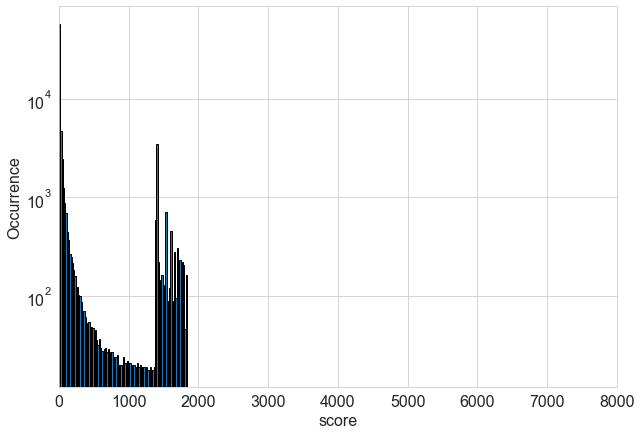

In [17]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
data['score'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,8000])
_ = ax.set_xlabel('score', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)

Our dataset contains over 80,000 comments. When looking at the distribution of the scores it appears we may have some issues as it appears we don't have a normal distribution. Below we'll plot some charts of the distribution and various normalization techniques.

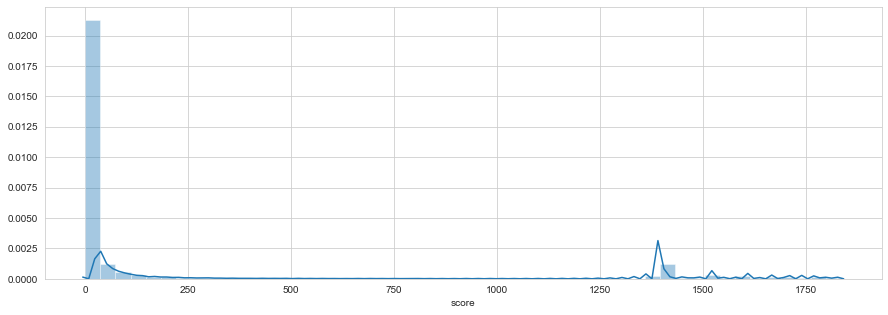

In [18]:
plt.figure(figsize=(15, 5))
sns.distplot(data.score);

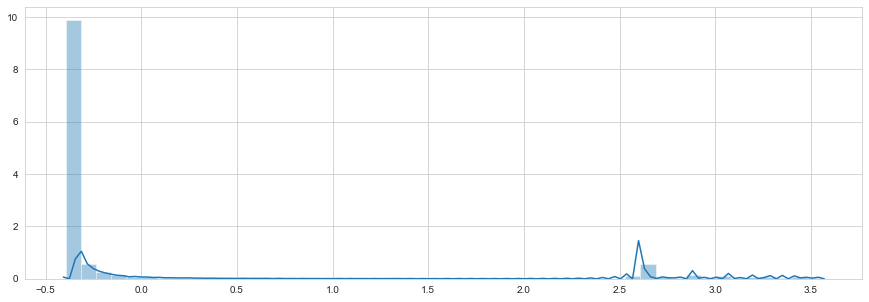

In [19]:
scaler = StandardScaler()
scores = scaler.fit_transform(data.score.values.reshape(-1,1))

plt.figure(figsize=(15, 5))
sns.distplot(scores);

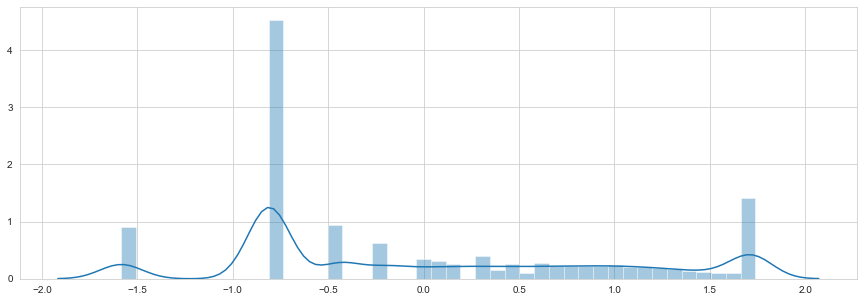

In [20]:
from sklearn.preprocessing import power_transform
scores = power_transform(data.score.values.reshape(-1,1), method='yeo-johnson')

plt.figure(figsize=(15, 5))
sns.distplot(scores);

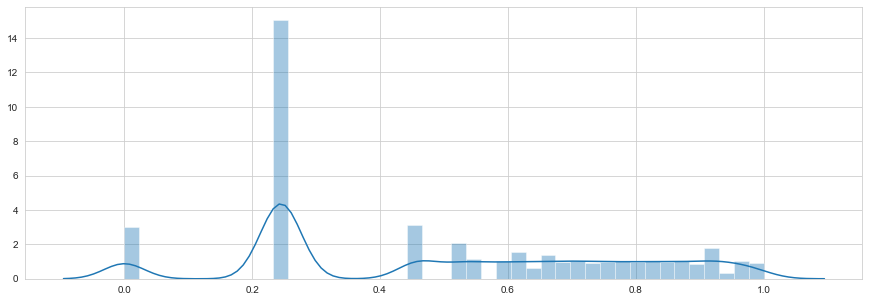

In [21]:
from sklearn.preprocessing import quantile_transform
scores = quantile_transform(data.score.values.reshape(-1,1), n_quantiles=99, random_state=0)
plt.figure(figsize=(15, 5))
sns.distplot(scores);

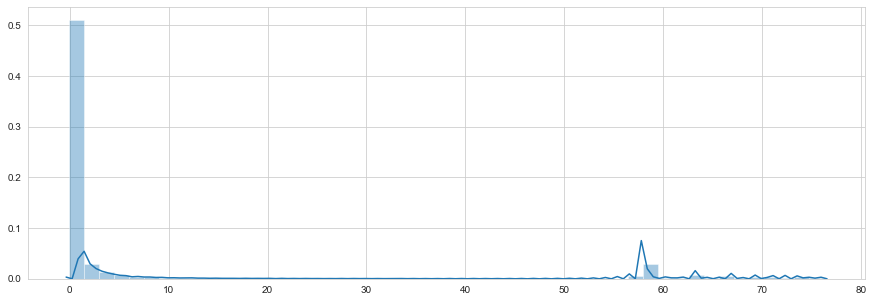

In [22]:
from sklearn.preprocessing import robust_scale
scores = robust_scale(data.score.values.reshape(-1,1))

plt.figure(figsize=(15, 5))
sns.distplot(scores);

In [23]:
data.score.quantile(np.linspace(.04, 1, 24, 0))

0.04       0.0
0.08       1.0
0.12       1.0
0.16       1.0
0.20       1.0
0.24       1.0
0.28       1.0
0.32       1.0
0.36       1.0
0.40       1.0
0.44       2.0
0.48       2.0
0.52       3.0
0.56       4.0
0.60       6.0
0.64       8.0
0.68      12.0
0.72      18.0
0.76      28.0
0.80      47.0
0.84      95.0
0.88     396.0
0.92    1395.0
0.96    1524.0
Name: score, dtype: float64

After exploring the distribution it appears that we may have some issues if we try to predict the score using regression. A better option would be to bin the data into categorical groups and use a classification model to predict groups of data.

We utilize the pandas cut method to group our data into 5 groups ('Downvoted', 'No Votes', '2-10 Votes', '11-50 Votes', '50+ Votes'). You can access a numerical representation of the category by callin the .cat.codes method.

### Catagorical Variable - Popular & Non Popular

Since there are serval values in the score so we cannot take all during modelling. So it is better to select group of score and assign those into some catagorial variable.

In [24]:
pd.cut(
    data.score, [-10000, 0, 1, 10, 50, 10000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular']).value_counts()

No-Votes       28005
2-10 Votes     19713
Popular        15598
11-50 Votes    11062
Non-Popular     5621
Name: score, dtype: int64

In [25]:
data['score_category'] = pd.cut(
    data.score, [-100000, 0, 1, 10, 50, 100000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'])

In [26]:
data.score_category.cat.categories

Index(['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'], dtype='object')

In [27]:
pd.concat([data.score_category, data.score_category.cat.codes], axis=1).tail(10)

,score_category,0
79991,No-Votes,1
79992,2-10 Votes,2
79993,2-10 Votes,2
79994,11-50 Votes,3
79995,2-10 Votes,2
79996,Non-Popular,0
79997,Popular,4
79998,11-50 Votes,3
79999,11-50 Votes,3
80000,Popular,4


In [28]:
data["Numerical_Score"] = pd.concat([data.score_category.cat.codes])

In [29]:
data.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments,score_category,Numerical_Score
0,The January 2019 Superthread,False,Racer_77,The Wiki Mod™ :pixel2xlblack:,1546360220,t5_3aobb,1656,1548973150,0,aa66wl,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,14.0,Popular,4
1,Have a perfectly balanced happy new year from ...,False,Dark_pheonix1183,Spider-Man,1546300881,t5_2uii8,1524,1552566683,0,abct96,marvelstudios,NaN,https://v.redd.it/lvyg8smibp721,2.0,Popular,4
2,You are not able to build on top of this gas s...,False,[deleted],NaN,1546300890,t5_3oeyf,1395,1552566695,0,abcuax,FortNiteBR,NaN,https://v.redd.it/7df5xwixbp721,0.0,Popular,4
3,Showerthought: F-14 Tomcats used by the Irania...,False,ChineseToTheBone,NaN,1546300800,t5_2tifv,1790,1552566697,0,abcufh,hoggit,NaN,https://www.reddit.com/r/hoggit/comments/abcuf...,27.0,Popular,4
4,Game Thread - Tampa Bay Lightning @ Anaheim Ducks,False,wild-wing,NaN,1546300800,t5_2rqhz,1741,1552566697,0,abcufj,AnaheimDucks,NaN,https://www.reddit.com/r/AnaheimDucks/comments...,109.0,Popular,4


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79999 entries, 0 to 80000
Data columns (total 16 columns):
title                79999 non-null object
archived             79509 non-null object
author               79999 non-null object
author_flair_text    9160 non-null object
created_utc          79999 non-null object
subreddit_id         79999 non-null object
score                79999 non-null int16
retrieved_on         79999 non-null object
gilded               79999 non-null object
id                   79999 non-null object
subreddit            79999 non-null object
distinguished        889 non-null object
url                  79999 non-null object
num_comments         79999 non-null float64
score_category       79999 non-null category
Numerical_Score      79999 non-null int8
dtypes: category(1), float64(1), int16(1), int8(1), object(12)
memory usage: 8.9+ MB


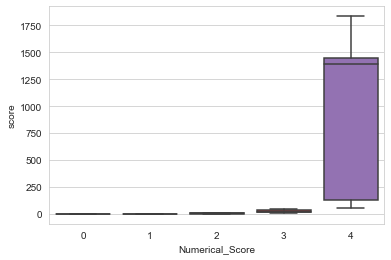

In [31]:
box = sns.boxplot(x='Numerical_Score', y='score', data=data)
plt.show()

### Saving Combined DataFrame

Now we are going to save the data for future use

In [32]:
data.to_csv("combined_data.csv")

### Working on Individual Dataset

Now here we will do the same as above for individual dataset and create training, test and validation data


### Training Data

In [33]:
df1.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments
0,The January 2019 Superthread,False,Racer_77,The Wiki Mod™ :pixel2xlblack:,1546360220,t5_3aobb,38,1548973150,0,aa66wl,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,14.0
1,Have a perfectly balanced happy new year from ...,False,Dark_pheonix1183,Spider-Man,1546300881,t5_2uii8,2,1552566683,0,abct96,marvelstudios,NaN,https://v.redd.it/lvyg8smibp721,2.0
2,You are not able to build on top of this gas s...,False,[deleted],NaN,1546300890,t5_3oeyf,1,1552566695,0,abcuax,FortNiteBR,NaN,https://v.redd.it/7df5xwixbp721,0.0
3,Showerthought: F-14 Tomcats used by the Irania...,False,ChineseToTheBone,NaN,1546300800,t5_2tifv,80,1552566697,0,abcufh,hoggit,NaN,https://www.reddit.com/r/hoggit/comments/abcuf...,27.0
4,Game Thread - Tampa Bay Lightning @ Anaheim Ducks,False,wild-wing,NaN,1546300800,t5_2rqhz,6,1552566697,0,abcufj,AnaheimDucks,NaN,https://www.reddit.com/r/AnaheimDucks/comments...,109.0


In [34]:
nan_idx = df1.loc[df1.title.isnull()].index
df1.drop(df1.index[[nan_idx]], inplace=True)
df1.shape

(39999, 14)

In [35]:
df1['score'] = df1['score'].astype('category')
cat_columns = df1.select_dtypes(['category']).columns
df1[cat_columns] = df1[cat_columns].apply(lambda x: x.cat.codes)

In [36]:
df1.info()
print("Min score in tha table : " + str(df1['score'].min()))
print("Max score in tha table : " + str(df1['score'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 40000
Data columns (total 14 columns):
title                39999 non-null object
archived             39954 non-null object
author               39999 non-null object
author_flair_text    5044 non-null object
created_utc          39999 non-null object
subreddit_id         39999 non-null object
score                39999 non-null int16
retrieved_on         39999 non-null object
gilded               39999 non-null object
id                   39999 non-null object
subreddit            39999 non-null object
distinguished        442 non-null object
url                  39999 non-null object
num_comments         39999 non-null float64
dtypes: float64(1), int16(1), object(12)
memory usage: 4.3+ MB
Min score in tha table : 0
Max score in tha table : 1359


In [37]:
df1.score.describe()

count    39999.000000
mean       233.467962
std        418.427823
min          0.000000
25%          1.000000
50%          4.000000
75%        109.000000
max       1359.000000
Name: score, dtype: float64

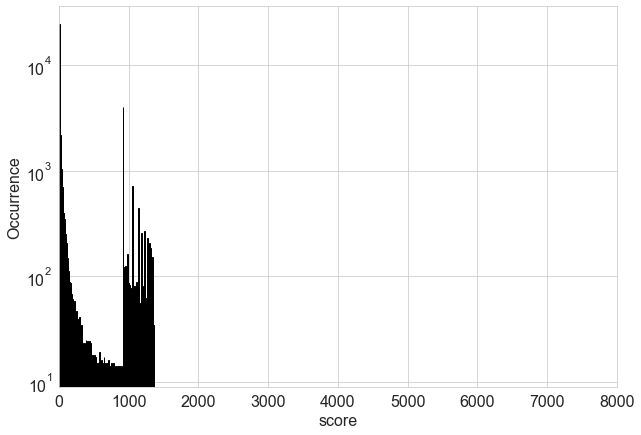

In [38]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
df1['score'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,8000])
_ = ax.set_xlabel('score', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)

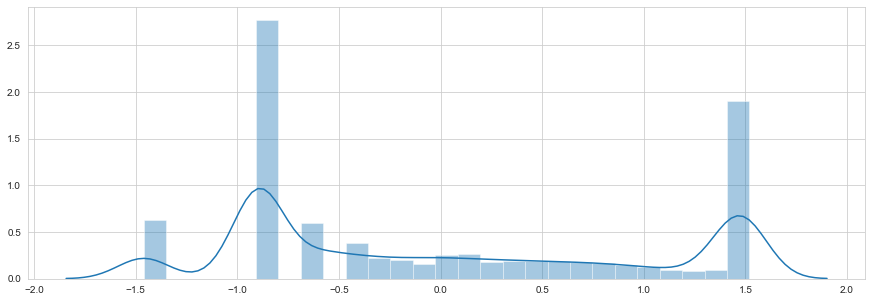

In [39]:
from sklearn.preprocessing import power_transform
scores = power_transform(df1.score.values.reshape(-1,1), method='yeo-johnson')
plt.figure(figsize=(15, 5))
sns.distplot(scores);

In [40]:
df1.score.quantile(np.linspace(.04, 1, 24, 0))

0.04       0.0
0.08       1.0
0.12       1.0
0.16       1.0
0.20       1.0
0.24       1.0
0.28       1.0
0.32       1.0
0.36       1.0
0.40       2.0
0.44       2.0
0.48       3.0
0.52       5.0
0.56       7.0
0.60      11.0
0.64      17.0
0.68      29.0
0.72      55.0
0.76     150.0
0.80     918.0
0.84     919.0
0.88     919.0
0.92    1048.0
0.96    1191.0
Name: score, dtype: float64

In [41]:
pd.cut(
    df1.score, [-10000, 0, 1, 10, 50, 10000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular']).value_counts()

No-Votes       12248
Popular        11400
2-10 Votes      8908
11-50 Votes     4638
Non-Popular     2805
Name: score, dtype: int64

In [42]:
df1['score_category'] = pd.cut(
    df1.score, [-100000, 0, 1, 10, 50, 100000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'])

In [43]:
df1.score_category.cat.categories

Index(['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'], dtype='object')

In [44]:
pd.concat([df1.score_category, df1.score_category.cat.codes], axis=1).tail(10)

,score_category,0
39991,11-50 Votes,3
39992,Non-Popular,0
39993,11-50 Votes,3
39994,Non-Popular,0
39995,2-10 Votes,2
39996,Non-Popular,0
39997,No-Votes,1
39998,11-50 Votes,3
39999,2-10 Votes,2
40000,No-Votes,1


In [45]:
df1["Numerical_Score"] = pd.concat([df1.score_category.cat.codes])

In [46]:
df1.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments,score_category,Numerical_Score
0,The January 2019 Superthread,False,Racer_77,The Wiki Mod™ :pixel2xlblack:,1546360220,t5_3aobb,1180,1548973150,0,aa66wl,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,14.0,Popular,4
1,Have a perfectly balanced happy new year from ...,False,Dark_pheonix1183,Spider-Man,1546300881,t5_2uii8,1048,1552566683,0,abct96,marvelstudios,NaN,https://v.redd.it/lvyg8smibp721,2.0,Popular,4
2,You are not able to build on top of this gas s...,False,[deleted],NaN,1546300890,t5_3oeyf,919,1552566695,0,abcuax,FortNiteBR,NaN,https://v.redd.it/7df5xwixbp721,0.0,Popular,4
3,Showerthought: F-14 Tomcats used by the Irania...,False,ChineseToTheBone,NaN,1546300800,t5_2tifv,1314,1552566697,0,abcufh,hoggit,NaN,https://www.reddit.com/r/hoggit/comments/abcuf...,27.0,Popular,4
4,Game Thread - Tampa Bay Lightning @ Anaheim Ducks,False,wild-wing,NaN,1546300800,t5_2rqhz,1265,1552566697,0,abcufj,AnaheimDucks,NaN,https://www.reddit.com/r/AnaheimDucks/comments...,109.0,Popular,4


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 40000
Data columns (total 16 columns):
title                39999 non-null object
archived             39954 non-null object
author               39999 non-null object
author_flair_text    5044 non-null object
created_utc          39999 non-null object
subreddit_id         39999 non-null object
score                39999 non-null int16
retrieved_on         39999 non-null object
gilded               39999 non-null object
id                   39999 non-null object
subreddit            39999 non-null object
distinguished        442 non-null object
url                  39999 non-null object
num_comments         39999 non-null float64
score_category       39999 non-null category
Numerical_Score      39999 non-null int8
dtypes: category(1), float64(1), int16(1), int8(1), object(12)
memory usage: 4.4+ MB


In [48]:
df1.to_csv("training_data.csv")

### Testing Data

In [49]:
df2.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments
0,Job Description for the Stay-At-Home Mom Job D...,NaN,Donaldfxre,NaN,1556668800,t5_yy0v9,1,1556755178,0,bjalrb,u_Donaldfxre,NaN,https://fastmoney.moneybot.in.net/job-descript...,0
1,Because I’ve hurt my bf (M24) in the past I (F...,False,throwaway9173649266,NaN,1556668800,t5_2qjvn,1,1560620602,0,bjalrc,relationships,NaN,https://www.reddit.com/r/relationships/comment...,1
2,Found this Music Note Watch On The Street In A...,False,[deleted],NaN,1556668800,t5_2ti4h,16,1560620602,0,bjalrd,mildlyinteresting,NaN,https://i.redd.it/xjahiippphv21.png,1
3,Once I had a nightmare that started looking ov...,False,Jackson-King,"🎉 1,000,000 Attendee! 🎉",1556668800,t5_2rjli,6,1560620602,0,bjalre,teenagers,NaN,https://www.reddit.com/r/teenagers/comments/bj...,3
4,Babe with Big Ass Fucks in Ripped Fishnets and...,False,hot-x,NaN,1556668800,t5_wnujb,1,1560620602,0,bjalrf,make_me_cum,NaN,https://www.pornhub.com/view_video.php?viewkey...,0


In [50]:
nan_idx = df2.loc[df2.title.isnull()].index
df2.drop(df2.index[[nan_idx]], inplace=True)
df2.shape

(20000, 14)

In [51]:
df2['score'] = df2['score'].astype('category')
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)

In [52]:
df2.info()
print("Min score in tha table : " + str(df2['score'].min()))
print("Max score in tha table : " + str(df2['score'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 14 columns):
title                20000 non-null object
archived             19858 non-null object
author               20000 non-null object
author_flair_text    2044 non-null object
created_utc          20000 non-null int64
subreddit_id         20000 non-null object
score                20000 non-null int16
retrieved_on         20000 non-null int64
gilded               20000 non-null int64
id                   20000 non-null object
subreddit            20000 non-null object
distinguished        221 non-null object
url                  20000 non-null object
num_comments         20000 non-null int64
dtypes: int16(1), int64(4), object(9)
memory usage: 2.2+ MB
Min score in tha table : 0
Max score in tha table : 694


In [53]:
df2.score.describe()

count    20000.000000
mean        26.604450
std         81.816569
min          0.000000
25%          1.000000
50%          2.000000
75%         12.000000
max        694.000000
Name: score, dtype: float64

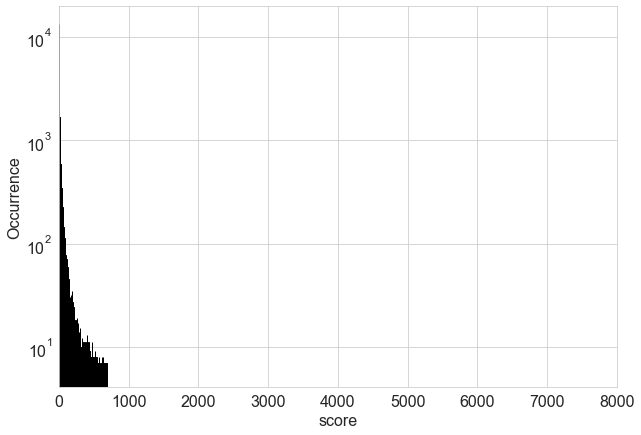

In [54]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
df2['score'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,8000])
_ = ax.set_xlabel('score', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)

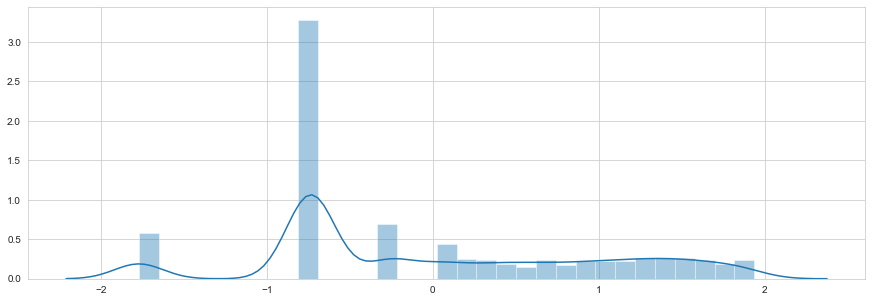

In [55]:
from sklearn.preprocessing import power_transform
scores = power_transform(df2.score.values.reshape(-1,1), method='yeo-johnson')
plt.figure(figsize=(15, 5))
sns.distplot(scores);

In [56]:
df2.score.quantile(np.linspace(.04, 1, 24, 0))

0.04      0.00
0.08      1.00
0.12      1.00
0.16      1.00
0.20      1.00
0.24      1.00
0.28      1.00
0.32      1.00
0.36      1.00
0.40      1.00
0.44      1.00
0.48      2.00
0.52      2.00
0.56      3.00
0.60      4.00
0.64      5.00
0.68      7.00
0.72      9.00
0.76     13.00
0.80     19.00
0.84     28.00
0.88     43.00
0.92     74.00
0.96    175.04
Name: score, dtype: float64

In [57]:
pd.cut(
    df2.score, [-10000, 0, 1, 10, 50, 10000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular']).value_counts()

No-Votes       7842
2-10 Votes     5489
11-50 Votes    3135
Popular        2143
Non-Popular    1391
Name: score, dtype: int64

In [58]:
df2['score_category'] = pd.cut(
    df2.score, [-100000, 0, 1, 10, 50, 100000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'])

In [59]:
df2.score_category.cat.categories

Index(['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'], dtype='object')

In [60]:
pd.concat([df2.score_category, df2.score_category.cat.codes], axis=1).tail(10)

,score_category,0
19990,11-50 Votes,3
19991,No-Votes,1
19992,Non-Popular,0
19993,2-10 Votes,2
19994,No-Votes,1
19995,2-10 Votes,2
19996,Non-Popular,0
19997,No-Votes,1
19998,No-Votes,1
19999,2-10 Votes,2


In [61]:
df2["Numerical_Score"] = pd.concat([df2.score_category.cat.codes])

In [62]:
df2.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments,score_category,Numerical_Score
0,Job Description for the Stay-At-Home Mom Job D...,NaN,Donaldfxre,NaN,1556668800,t5_yy0v9,1,1556755178,0,bjalrb,u_Donaldfxre,NaN,https://fastmoney.moneybot.in.net/job-descript...,0,No-Votes,1
1,Because I’ve hurt my bf (M24) in the past I (F...,False,throwaway9173649266,NaN,1556668800,t5_2qjvn,1,1560620602,0,bjalrc,relationships,NaN,https://www.reddit.com/r/relationships/comment...,1,No-Votes,1
2,Found this Music Note Watch On The Street In A...,False,[deleted],NaN,1556668800,t5_2ti4h,16,1560620602,0,bjalrd,mildlyinteresting,NaN,https://i.redd.it/xjahiippphv21.png,1,11-50 Votes,3
3,Once I had a nightmare that started looking ov...,False,Jackson-King,"🎉 1,000,000 Attendee! 🎉",1556668800,t5_2rjli,6,1560620602,0,bjalre,teenagers,NaN,https://www.reddit.com/r/teenagers/comments/bj...,3,2-10 Votes,2
4,Babe with Big Ass Fucks in Ripped Fishnets and...,False,hot-x,NaN,1556668800,t5_wnujb,1,1560620602,0,bjalrf,make_me_cum,NaN,https://www.pornhub.com/view_video.php?viewkey...,0,No-Votes,1


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 16 columns):
title                20000 non-null object
archived             19858 non-null object
author               20000 non-null object
author_flair_text    2044 non-null object
created_utc          20000 non-null int64
subreddit_id         20000 non-null object
score                20000 non-null int16
retrieved_on         20000 non-null int64
gilded               20000 non-null int64
id                   20000 non-null object
subreddit            20000 non-null object
distinguished        221 non-null object
url                  20000 non-null object
num_comments         20000 non-null int64
score_category       20000 non-null category
Numerical_Score      20000 non-null int8
dtypes: category(1), int16(1), int64(4), int8(1), object(9)
memory usage: 2.2+ MB


In [64]:
df2.to_csv("testing_data.csv")

### Validation Data

In [65]:
df3.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments
0,2ND DEAD MEME EVENT! TOP 5 MEMES WILL BE AWARD...,False,MelanieLN,NaN,1561991723,t5_11ihnf,2,1565735699,0,bveihe,ReviveDeadMeme,moderator,https://www.reddit.com/r/ReviveDeadMeme/commen...,1
1,"Euphoria: S1 E3 ""Made You Look"" - Episode Disc...",False,nika,:ashtray: welcome to pretzelmania,1561946463,t5_2ssjq,310,1566269606,0,bzjqe2,euphoria,moderator,https://www.reddit.com/r/euphoria/comments/bzj...,1478
2,ACRL GT3 Series - Round 4 @ Spa-Francorchamps ...,False,[deleted],NaN,1561968539,t5_311cm,1,1566713016,0,c3dda6,acrl,NaN,https://www.reddit.com/r/acrl/comments/c3dda6/...,2
3,June 2019 Concept Awards Results+July 2019 Con...,False,ThatOneOrochiGuy,NaN,1561963826,t5_11q8pz,3,1566735756,0,c4eut2,smashconcepts,NaN,https://www.reddit.com/r/smashconcepts/comment...,6
4,"The July 2019 Superthread: #LeaksByGoogle, Bat...",False,Racer_77,:partyparrot: The Wiki Mod™ :pixel2xlblack:,1561995021,t5_3aobb,52,1566749328,0,c4z439,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,0


In [66]:
nan_idx = df3.loc[df3.title.isnull()].index
df3.drop(df3.index[[nan_idx]], inplace=True)
df3.shape

(20000, 14)

In [67]:
df3['score'] = df3['score'].astype('category')
cat_columns = df3.select_dtypes(['category']).columns
df3[cat_columns] = df3[cat_columns].apply(lambda x: x.cat.codes)

In [68]:
df3.info()
print("Min score in tha table : " + str(df3['score'].min()))
print("Max score in tha table : " + str(df3['score'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 14 columns):
title                20000 non-null object
archived             19697 non-null object
author               20000 non-null object
author_flair_text    2072 non-null object
created_utc          20000 non-null int64
subreddit_id         20000 non-null object
score                20000 non-null int16
retrieved_on         20000 non-null int64
gilded               20000 non-null int64
id                   20000 non-null object
subreddit            20000 non-null object
distinguished        226 non-null object
url                  20000 non-null object
num_comments         20000 non-null int64
dtypes: int16(1), int64(4), object(9)
memory usage: 2.2+ MB
Min score in tha table : 0
Max score in tha table : 678


In [69]:
df3.score.describe()

count    20000.000000
mean        25.727900
std         78.822508
min          0.000000
25%          1.000000
50%          2.000000
75%         12.000000
max        678.000000
Name: score, dtype: float64

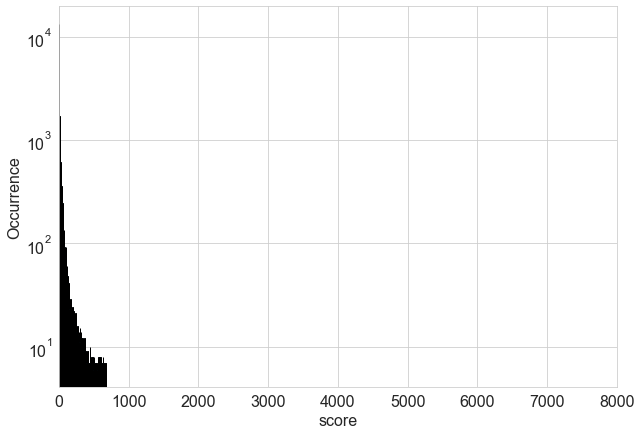

In [70]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
df3['score'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,8000])
_ = ax.set_xlabel('score', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)

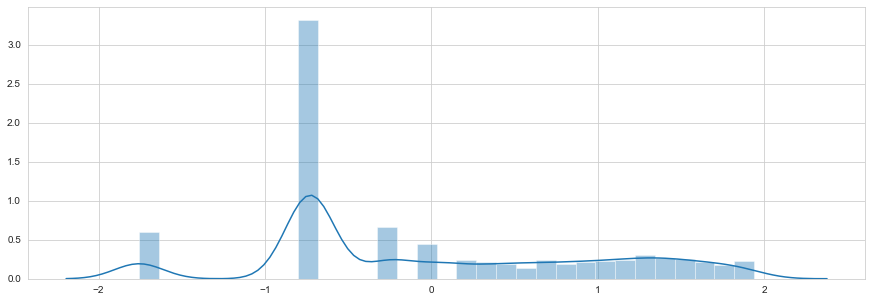

In [71]:
from sklearn.preprocessing import power_transform
scores = power_transform(df3.score.values.reshape(-1,1), method='yeo-johnson')
plt.figure(figsize=(15, 5))
sns.distplot(scores);

In [72]:
df3.score.quantile(np.linspace(.04, 1, 24, 0))

0.04      0.00
0.08      1.00
0.12      1.00
0.16      1.00
0.20      1.00
0.24      1.00
0.28      1.00
0.32      1.00
0.36      1.00
0.40      1.00
0.44      1.00
0.48      2.00
0.52      2.00
0.56      3.00
0.60      4.00
0.64      5.00
0.68      7.00
0.72      9.00
0.76     13.00
0.80     19.00
0.84     28.00
0.88     41.00
0.92     70.08
0.96    165.00
Name: score, dtype: float64

In [73]:
pd.cut(
    df3.score, [-10000, 0, 1, 10, 50, 10000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular']).value_counts()

No-Votes       7915
2-10 Votes     5316
11-50 Votes    3289
Popular        2055
Non-Popular    1425
Name: score, dtype: int64

In [74]:
df3['score_category'] = pd.cut(
    df3.score, [-100000, 0, 1, 10, 50, 100000],
    labels=['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'])

In [75]:
df3.score_category.cat.categories

Index(['Non-Popular', 'No-Votes', '2-10 Votes', '11-50 Votes', 'Popular'], dtype='object')

In [76]:
pd.concat([df3.score_category, df3.score_category.cat.codes], axis=1).tail(10)

,score_category,0
19990,No-Votes,1
19991,2-10 Votes,2
19992,2-10 Votes,2
19993,11-50 Votes,3
19994,2-10 Votes,2
19995,Non-Popular,0
19996,Popular,4
19997,11-50 Votes,3
19998,11-50 Votes,3
19999,Popular,4


In [77]:
df3["Numerical_Score"] = pd.concat([df3.score_category.cat.codes])

In [78]:
df3.head()

,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments,score_category,Numerical_Score
0,2ND DEAD MEME EVENT! TOP 5 MEMES WILL BE AWARD...,False,MelanieLN,NaN,1561991723,t5_11ihnf,2,1565735699,0,bveihe,ReviveDeadMeme,moderator,https://www.reddit.com/r/ReviveDeadMeme/commen...,1,2-10 Votes,2
1,"Euphoria: S1 E3 ""Made You Look"" - Episode Disc...",False,nika,:ashtray: welcome to pretzelmania,1561946463,t5_2ssjq,290,1566269606,0,bzjqe2,euphoria,moderator,https://www.reddit.com/r/euphoria/comments/bzj...,1478,Popular,4
2,ACRL GT3 Series - Round 4 @ Spa-Francorchamps ...,False,[deleted],NaN,1561968539,t5_311cm,1,1566713016,0,c3dda6,acrl,NaN,https://www.reddit.com/r/acrl/comments/c3dda6/...,2,No-Votes,1
3,June 2019 Concept Awards Results+July 2019 Con...,False,ThatOneOrochiGuy,NaN,1561963826,t5_11q8pz,3,1566735756,0,c4eut2,smashconcepts,NaN,https://www.reddit.com/r/smashconcepts/comment...,6,2-10 Votes,2
4,"The July 2019 Superthread: #LeaksByGoogle, Bat...",False,Racer_77,:partyparrot: The Wiki Mod™ :pixel2xlblack:,1561995021,t5_3aobb,52,1566749328,0,c4z439,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,0,Popular,4


In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 16 columns):
title                20000 non-null object
archived             19697 non-null object
author               20000 non-null object
author_flair_text    2072 non-null object
created_utc          20000 non-null int64
subreddit_id         20000 non-null object
score                20000 non-null int16
retrieved_on         20000 non-null int64
gilded               20000 non-null int64
id                   20000 non-null object
subreddit            20000 non-null object
distinguished        226 non-null object
url                  20000 non-null object
num_comments         20000 non-null int64
score_category       20000 non-null category
Numerical_Score      20000 non-null int8
dtypes: category(1), int16(1), int64(4), int8(1), object(9)
memory usage: 2.2+ MB


In [80]:
df3.to_csv("validation_data.csv")

In [81]:
%ls RS*.csv

 Volume in drive C is OS
 Volume Serial Number is D02B-1246

 Directory of C:\Users\somak\Desktop\Python-Reddit-Data-Prediction-Machine-Learning

2020-04-21  06:18 PM        71,282,650 RS_2019_01_02_03_04.csv
2020-04-21  06:18 PM        36,320,928 RS_2019_05_06.csv
2020-04-21  06:18 PM        36,030,582 RS_2019_07_08.csv
               3 File(s)    143,634,160 bytes
               0 Dir(s)  98,432,016,384 bytes free


In [82]:
for filename in os.listdir():
    if filename.endswith(".csv") and filename.startswith("RS"):
        os.remove(filename)
        print(filename, "remove !!!!")

RS_2019_01_02_03_04.csv remove !!!!
RS_2019_05_06.csv remove !!!!
RS_2019_07_08.csv remove !!!!


In [83]:
%ls RS*.csv

 Volume in drive C is OS
 Volume Serial Number is D02B-1246

 Directory of C:\Users\somak\Desktop\Python-Reddit-Data-Prediction-Machine-Learning



File Not Found
